In [1]:
import pathlib
import logging

import pandas as pd

import llm_moral_values as llmv


logging.getLogger().setLevel(logging.INFO)

In [2]:
MODEL_ORDER = [
    "gemma2:27b",
    "llama3.1:8b",
    "llama3.1:70b",
    "qwen2:72b",
    "phi3:14b",
]
PERSONA_ORDER = ["liberal", "moderate", "conservative"]

In [3]:
llmv.pipelines.ConductSurvey(
    iterations=10,
    models=[
        llmv.schemas.Model(id=model)
        for model in [
            "gemma2:27b-instruct-q6_K",
            "llama3.1:8b-instruct-q6_K",
            "llama3.1:70b-instruct-q6_K",
            "qwen2:72b-instruct-q6_K",
            "phi3:14b-medium-128k-instruct-q6_K",
        ]
    ],
    survey=llmv.questionnaire.Survey(path="../../data/survey/moral_foundations"),
    personas=[
        llmv.schemas.Persona.model_validate_json(open(path, "r").read())
        for path in list(pathlib.Path("./personas/").iterdir())
    ],
    export_path=pathlib.Path("./data/"),
)()

INFO:root:> Conducting Survey
INFO:root:Generated 3 surveys for configuration: gemma2-27b:conservative
INFO:root:Generated 3 surveys for configuration: gemma2-27b:moderate
INFO:root:Generated 3 surveys for configuration: gemma2-27b:liberal
INFO:root:Generated 3 surveys for configuration: llama3.1-8b:conservative
INFO:root:Generated 3 surveys for configuration: llama3.1-8b:moderate
INFO:root:Generated 3 surveys for configuration: llama3.1-8b:liberal
INFO:root:Generated 3 surveys for configuration: llama3.1-70b:conservative
INFO:root:Generated 3 surveys for configuration: llama3.1-70b:moderate
INFO:root:Generated 3 surveys for configuration: llama3.1-70b:liberal
INFO:root:Generated 3 surveys for configuration: qwen2-72b:conservative
INFO:root:Generated 3 surveys for configuration: qwen2-72b:moderate
INFO:root:Generated 3 surveys for configuration: qwen2-72b:liberal
INFO:root:Generated 3 surveys for configuration: phi3-14b:conservative
INFO:root:Generated 3 surveys for configuration: phi3

In [4]:
dataset: llmv.data.Survey = llmv.data.Survey(data=pd.read_parquet("./data/survey.parquet"))
dataset.data

dimension  response
segment   id model      persona                         
agreement 1  gemma2:27b conservative      harm         3
                        conservative      harm         3
                        conservative      harm         3
                        liberal           harm         4
                        liberal           harm         4
...                                        ...       ...
relevance 16 qwen2:72b  liberal         purity         2
                        liberal         purity         2
                        moderate        purity         2
                        moderate        purity         2
                        moderate        purity         2

[1440 rows x 2 columns]

In [5]:
(dataset.data.groupby(["model", "persona", "dimension"], observed=True).mean().squeeze(axis=1))

model       persona       dimension
gemma2:27b  conservative  authority    4.000000
                          catch        3.000000
                          fairness     3.000000
                          harm         3.000000
                          ingroup      3.000000
                                         ...   
qwen2:72b   moderate      catch        2.500000
                          fairness     3.500000
                          harm         3.333333
                          ingroup      3.000000
                          purity       2.000000
Name: response, Length: 90, dtype: float64

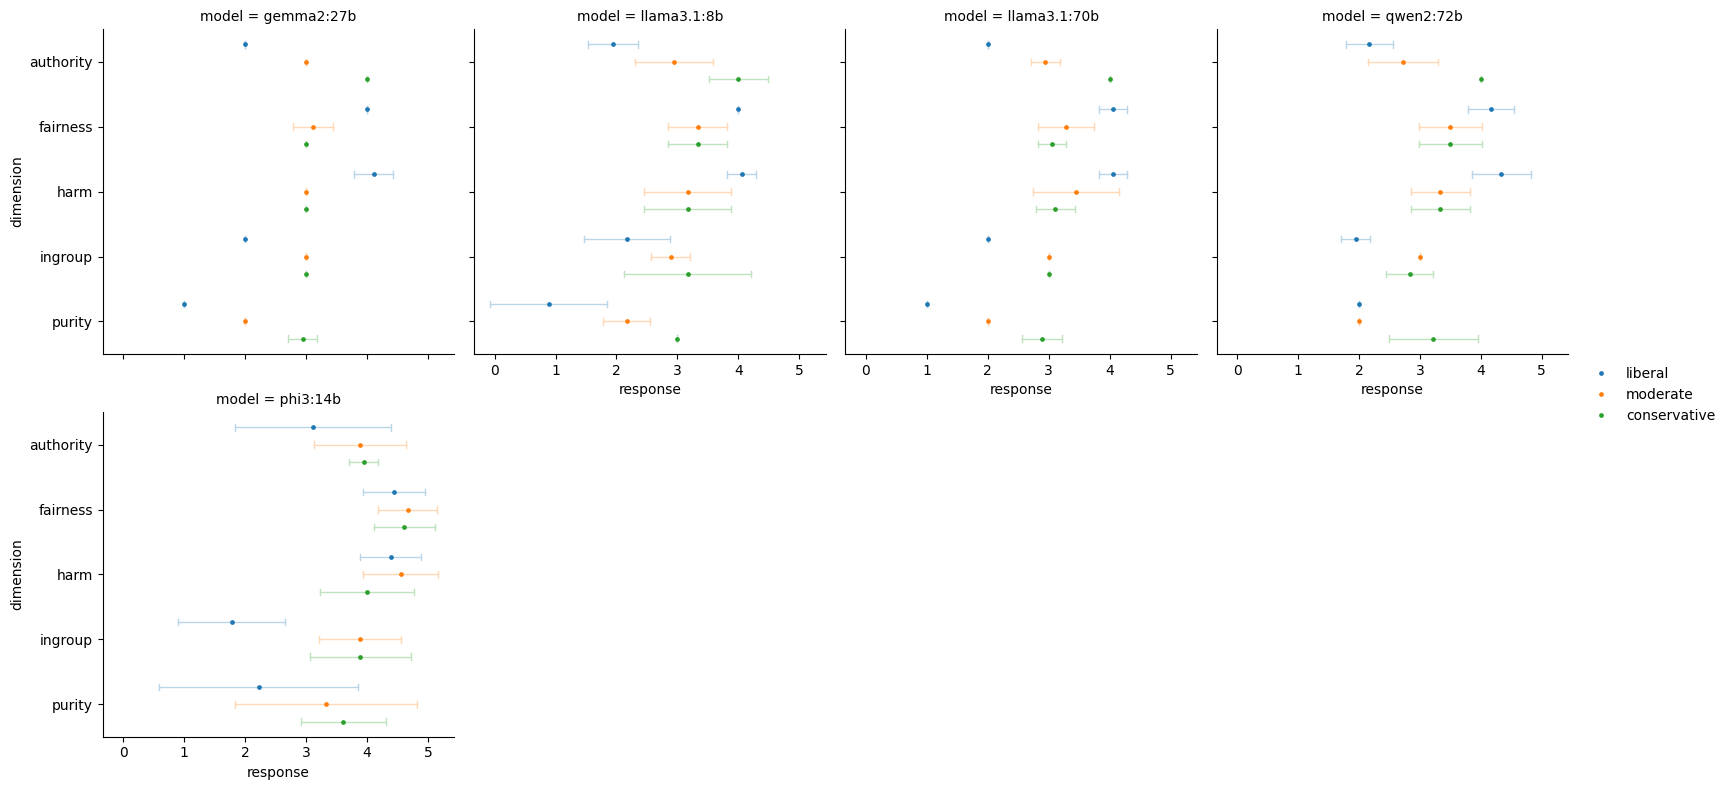

In [6]:
dataset.plot(
    "./report/points.by.model_persona_dimension.pdf",
    model_order=MODEL_ORDER,
    persona_order=PERSONA_ORDER,
)

In [7]:
cross_evaluation: llmv.data.CrossEvaluation = llmv.data.CrossEvaluation(
    data=pd.read_parquet("./data/cross_evaluation.parquet")
)
cross_evaluation.data

sample                    anonymous                               us  \
group                       liberal  moderate conservative   liberal   
model        persona                                                   
gemma2:27b   liberal       0.477778  0.792222     1.116222  0.222222   
             moderate      0.797778  0.607778     0.531778  0.817778   
             conservative  1.128889  0.641111     0.525111  1.228889   
llama3.1:70b liberal       0.477778  0.792222     1.116222  0.222222   
             moderate      0.664444  0.474444     0.420667  0.684444   
             conservative  1.084444  0.618889     0.502889  1.184444   
llama3.1:8b  liberal       0.488889  0.781111     1.105111  0.235556   
             moderate      0.653333  0.507778     0.454000  0.740000   
             conservative  1.073333  0.563333     0.399333  1.173333   
phi3:14b     liberal       0.377778  0.638889     0.842889  0.797778   
             moderate      0.966667  0.716667     0.739333  1.566667   
             conservative  1.011111  0.661111     0.657111  1.511111   
qwen2:72b    liberal       0.211111  0.647778     0.971778  0.464444   
             moderate      0.597778  0.438889     0.442889  0.617778   
             conservative  0.984444  0.541111     0.336222  1.084444   

sample                                              korean            \
group                      moderate conservative   liberal  moderate   
model        persona                                                   
gemma2:27b   liberal       0.752222     1.402222  0.642222  0.872222   
             moderate      0.327778     0.402222  0.517778  0.387778   
             conservative  0.658889     0.231111  0.768889  0.538889   
llama3.1:70b liberal       0.752222     1.402222  0.642222  0.872222   
             moderate      0.212222     0.535556  0.422222  0.332222   
             conservative  0.614444     0.253333  0.724444  0.494444   
llama3.1:8b  liberal       0.741111     1.391111  0.631111  0.861111   
             moderate      0.183333     0.480000  0.373333  0.243333   
             conservative  0.603333     0.246667  0.713333  0.483333   
phi3:14b     liberal       0.667778     1.124444  0.708889  0.818889   
             moderate      1.196667     0.846667  1.306667  1.176667   
             conservative  1.141111     0.791111  1.251111  1.121111   
qwen2:72b    liberal       0.607778     1.257778  0.497778  0.727778   
             moderate      0.147778     0.602222  0.317778  0.281111   
             conservative  0.534444     0.384444  0.624444  0.487778   

sample                                  
group                     conservative  
model        persona                    
gemma2:27b   liberal          1.022222  
             moderate         0.282222  
             conservative     0.388889  
llama3.1:70b liberal          1.022222  
             moderate         0.253333  
             conservative     0.344444  
llama3.1:8b  liberal          1.011111  
             moderate         0.226667  
             conservative     0.426667  
phi3:14b     liberal          0.828889  
             moderate         1.086667  
             conservative     1.031111  
qwen2:72b    liberal          0.877778  
             moderate         0.308889  
             conservative     0.404444

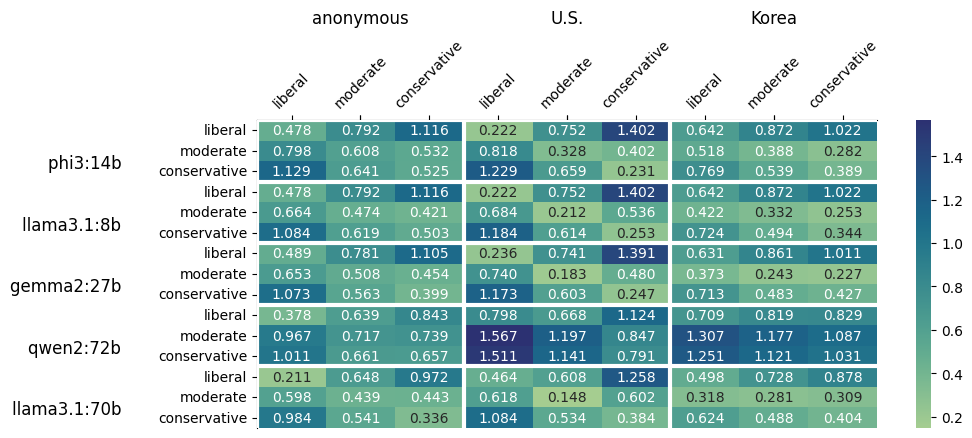

In [8]:
cross_evaluation.plot("./report/heat.cross_evaluation.pdf")